In [220]:
import matplotlib.pyplot as plt
import numpy as np

In [207]:
rows = 5
cols = 5
top_temp = 100
left_temp = 200
right_temp = 300
bottom_temp = 400
epsilon = 0.01

In [208]:
hotplate = np.zeros((rows, cols))

In [209]:
hotplate[0,:] = top_temp
hotplate[:,0] = left_temp
hotplate[:,-1] = right_temp
hotplate[-1,:] = bottom_temp

In [210]:
hotplate

array([[200., 100., 100., 100., 300.],
       [200.,   0.,   0.,   0., 300.],
       [200.,   0.,   0.,   0., 300.],
       [200.,   0.,   0.,   0., 300.],
       [400., 400., 400., 400., 400.]])

In [211]:
avg = (np.sum(hotplate[0,:] + hotplate[-1,:]) + np.sum(hotplate[1:-1,0] + hotplate[1:-1, -1])) / (2*rows + 2*cols - 4)
avg

268.75

In [212]:
hotplate[1:-1,1:-1] = avg
hotplate

array([[200.  , 100.  , 100.  , 100.  , 300.  ],
       [200.  , 268.75, 268.75, 268.75, 300.  ],
       [200.  , 268.75, 268.75, 268.75, 300.  ],
       [200.  , 268.75, 268.75, 268.75, 300.  ],
       [400.  , 400.  , 400.  , 400.  , 400.  ]])

In [213]:
alpha = 0.1

In [214]:
count = 0
while True:
    max_diff = 0
    count += 1
    for i in range(1, len(hotplate) - 1):
        for j in range(1, len(hotplate) - 1):
            new_temp = (hotplate[i-1][j] + hotplate[i+1][j] + hotplate[i][j-1] + hotplate[i][j+1]) / 4.0
            diff = new_temp - hotplate[i][j]
            max_diff = max(max_diff, diff)
            hotplate[i][j] += diff
    print(count, max_diff)
    if max_diff < epsilon:
        break

1 45.4345703125
2 11.773681640625
3 3.41796875
4 1.708984375
5 0.8544921875
6 0.42724609375
7 0.213623046875
8 0.1068115234375
9 0.05340576171875
10 0.026702880859375
11 0.0133514404296875
12 0.00667572021484375


In [ ]:
hotplate

In [215]:
import tensorflow as tf
import tensorflow.keras as keras

In [219]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [228]:
x_train = x_train / float(np.max(x_train))

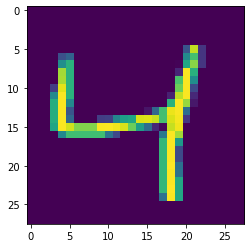

In [253]:
plt.imshow(x_train[2])

In [259]:
x = keras.layers.Input((28,28))
y = keras.layers.Flatten()(x)
y = keras.layers.Dense(64, activation="tanh")(y)
y = keras.layers.Dense(64, activation="tanh")(y)
y = keras.layers.Dropout(0.5)(y)
y = keras.layers.Dense(64, activation="tanh")(y)
y = keras.layers.Dense(64, activation="tanh")(y)
y = keras.layers.Dropout(0.5)(y)
y = keras.layers.Dense(10, activation="softmax")(y)

model = keras.Model(x, y)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    optimizer=keras.optimizers.Adam()
)

In [260]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5297 - sparse_categorical_accuracy: 0.8394 - val_loss: 0.2145 - val_sparse_categorical_accuracy: 0.9380
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2833 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.1748 - val_sparse_categorical_accuracy: 0.9521
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2169 - sparse_categorical_accuracy: 0.9400 - val_loss: 0.1531 - val_sparse_categorical_accuracy: 0.9581
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1853 - sparse_categorical_accuracy: 0.9492 - val_loss: 0.1554 - val_sparse_categorical_accuracy: 0.9582
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1625 - sparse_categorical_accuracy: 0.9561 - val_loss: 0.1404 - val_sparse_categorical_accuracy: 0.9623
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1401 - spars

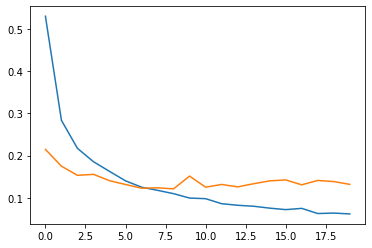

In [261]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [257]:
model.fit(dataset, validation_data=val_dataset)

NameError: name 'dataset' is not defined